# Numpy -  многомерные массивы данных

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Введение

Пакет (модуль) `numpy` используется почти во всех численных вычислениях с использованием Python. Это пакет, который обеспечивает высокопроизводительные векторные, матричные и многомерные структуры данных для Python. Он реализован на C и Fortran, поэтому, когда вычисления векторизованы (сформулированы с векторами и матрицами), производительность очень хорошая.

In [2]:
import numpy as np

В пакете `numpy` для векторов, матриц и многомерных наборов данных используется терминология *массив*.

## Создание массивов `numpy` 

Существует множество возможностей создания массивов в `numpy`:
* список или кортеж Python
* используя функции предназначенные для создания массивов `numpy`, такие как `arange`, `linspace` и т.д.
* чтение данных из файлов

### Из списков

Например, чтобы создать новый вектор и матрицу массивов из спосков Python достаточно использовать функцию `numpy.array`.

In [3]:
# вектор: аргумент функции массива питоновский список
v = np.array([1,2,3,4])

v

array([1, 2, 3, 4])

In [4]:
# матрица: аргумент функции вложенный список Python
M = np.array([[1, 2], [3, 4]])

M

array([[1, 2],
       [3, 4]])

И `v` и `M` объекты относятся к типу данных `ndarray` предоставлеямому модулем `numpy`.

In [5]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

Разница между `v` и `M` массивами только в их форме. Получить информацию о форме массива можно с помощью `ndarray.shape`.

In [6]:
v.shape

(4,)

In [7]:
M.shape

(2, 2)

Количество элементов в массиве доступно через свойство `ndarray.size`:

In [8]:
M.size

4

Точно так же мы могли бы использовать функцию `numpy.shape` и `numpy.size`

In [11]:
np.shape(M)

(2, 2)

In [12]:
np.size(M)

4

Пока что `numpy.ndarray` очень похож на список Python (или вложенный список). Почему бы просто не использовать списки Python для вычислений вместо создания нового типа массива?

Причин несколько:

* Списки Python очень общие. Они могут содержать любой объект. Они динамически типизированы. Они не поддерживают математические функции, такие как умножение матриц и точек и т.д. Реализация таких функций для списков Python не будет очень эффективной из-за динамической типизации.
* Массивы Numpy **статически типизированы** и **однородны**. Тип элементов определяется при создании массива.
* Массивы Numpy эффективны с точки зрения памяти. 
* Благодаря статической типизации, быстрая реализация математических функций, таких как умножение и сложение массивов numpy, может быть реализована на скомпилированном языке (используются C и Fortran).

Используя свойство `dtype` (тип данных) объекта `ndarray`, мы можем увидеть, какой тип имеют данные массива:

In [13]:
M.dtype

dtype('int64')

Мы получим ошибку, если попытаемся присвоить значение неправильного типа элементу в массиве numpy:

In [14]:
M[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

Если мы хотим, мы можем явно определить тип данных массива при его создании, используя аргумент `dtype`:

In [16]:
M = np.array([[1, 2], [3, 4]], dtype=complex)

M

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Основные типы данных `dtype`: `int`, `float`, `complex`, `bool`, `object`.

Мы также можем явно определить размер в битах типов данных, например: `int64`, `int16`, `float128`, `complex128`.

### Использование функций генерации массивов

Для больших массивов нецелесообразно инициализировать данные вручную, используя явные списки Python. Вместо этого мы можем использовать одну из многих функций в `numpy`, которые генерируют массивы разных форм. 

Некоторые из наиболее распространенных:

#### arange

In [17]:
x = np.arange(0, 10, 1) # arguments: start, stop, step

x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
x = np.arange(-1, 1, 0.1)

x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

#### linspace и logspace

Эта функция создает последовательность данных, равномерно расположенных на числовой прямой в заданном интервале.

In [19]:
# используя linspace обе точки включаются в массив
np.linspace(0, 10, 25)

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

Функция numpy.logspace() возвращает последовательность данных, равномерно расположенных в заданном интервале на числовой прямой в логарифмическом масштабе. Параметры у этой функции точно такие же, как и у numpy.linspace()

Логарифмический масштаб (шкала) — шкала, длина отрезка которой пропорциональна логарифму отношения величин, отмеченных на концах этого отрезка, в то время как на шкале в линейном масштабе длина отрезка пропорциональна разности величин на его концах.

In [21]:
np.logspace(0, 10, 10, base=np.e)

array([1.00000000e+00, 3.03773178e+00, 9.22781435e+00, 2.80316249e+01,
       8.51525577e+01, 2.58670631e+02, 7.85771994e+02, 2.38696456e+03,
       7.25095809e+03, 2.20264658e+04])

#### mgrid
Numpy Mgrid-это специальный тип массива numpy, который создает 2d-массив с аналогичными значениями. Сетка сетки многомерных массивов все одного размера и размерности. Полезно для создания координат.

In [22]:
x, y = np.mgrid[0:5, 0:5]

In [19]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [20]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

#### random data

In [23]:
np.random.rand(5,5)

array([[0.3611541 , 0.01193428, 0.58318712, 0.63921844, 0.1966497 ],
       [0.67969248, 0.70385301, 0.96799427, 0.21117177, 0.74713873],
       [0.56869708, 0.64823141, 0.92371307, 0.05228594, 0.41163059],
       [0.7944997 , 0.22298182, 0.23861202, 0.05648128, 0.09266724],
       [0.7870668 , 0.02054569, 0.01044461, 0.75508578, 0.37425684]])

In [24]:
# стандартное нормальное распределение

np.random.randn(5,5)

array([[ 0.3558192 ,  0.68402343, -0.33704271,  1.37777664,  1.58619415],
       [-0.66998457,  0.51106522,  0.42644548, -0.55781633,  0.11138569],
       [-0.01902596,  0.96582133, -0.63179724, -0.03742662,  1.6434489 ],
       [-0.92794646, -1.12237777, -0.65594864, -1.1985012 , -0.08708591],
       [-0.8469193 , -1.02531983, -1.29603089, -0.17194891,  0.4966351 ]])

#### diag

In [25]:
# диагональная матрица
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [26]:
# то же самое, но с отступом
np.diag([1,2,3], k=1) 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

#### zeros и ones

In [27]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [28]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## File I/O

### Comma-separated values (CSV)

Очень распространенный формат файлов для файлов данных - это значения, разделенные запятыми (CSV), или связанные форматы, такие как TSV (значения, разделенные табуляцией). Для чтения данных из таких файлов в массивы Numpy мы можем использовать функцию `numpy.genfromtxt`.

In [29]:
!head stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1


In [31]:
data = np.genfromtxt('stockholm_td_adj.dat')

In [32]:
data.shape

(77431, 7)

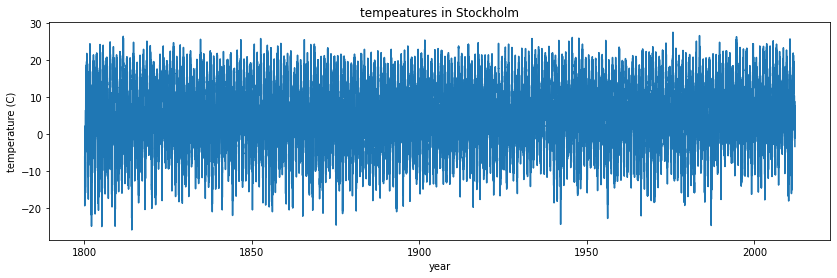

In [33]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5])
ax.axis('tight')
ax.set_title('tempeatures in Stockholm')
ax.set_xlabel('year')
ax.set_ylabel('temperature (C)');

Используя `numpy.savetxt` мы можем сохранить данные в CSV формат:

In [35]:
M = np.random.rand(3,3)

M

array([[0.57920982, 0.76717171, 0.36893422],
       [0.89478019, 0.64310731, 0.50252045],
       [0.61939279, 0.39568994, 0.1539383 ]])

In [36]:
np.savetxt("randommatrix.csv", M)

In [37]:
!cat randommatrix.csv #открыть файл в командной строке

5.792098223118490319e-01 7.671717075377790795e-01 3.689342208878052531e-01
8.947801909673533949e-01 6.431073144372604355e-01 5.025204486601880793e-01
6.193927923351467690e-01 3.956899361955479311e-01 1.539382981254814320e-01


In [38]:
np.savetxt("randommatrix.csv", M, fmt='%.5f') # fmt specifies the format

!cat randommatrix.csv

0.57921 0.76717 0.36893
0.89478 0.64311 0.50252
0.61939 0.39569 0.15394


### Numpy формат

Полезен для хранения массивов и обращения к ним позже. Используйте `numpy.save` и `numpy.load`:

In [39]:
np.save("randommatrix.npy", M)


In [40]:
np.load("randommatrix.npy")

array([[0.57920982, 0.76717171, 0.36893422],
       [0.89478019, 0.64310731, 0.50252045],
       [0.61939279, 0.39568994, 0.1539383 ]])

## Управление массивами

### Индексирование

Мы можем индексировать элементы в массиве, используя квадратные скобки и индексы:

In [41]:
# v - вектор, имеющий только одно измерение, с одним индексом
v[0]

1

In [42]:
# M - матрица или двумерный массив, принимающий два индекса
M[1,1]

0.6431073144372604

Если мы опускаем индекс многомерного массива, он возвращает всю строку (или, в общем, N-1 размерный массив)

In [43]:
M

array([[0.57920982, 0.76717171, 0.36893422],
       [0.89478019, 0.64310731, 0.50252045],
       [0.61939279, 0.39568994, 0.1539383 ]])

In [44]:
M[1]

array([0.89478019, 0.64310731, 0.50252045])

То же самое может быть достигнуто с использованием `:` вместо индекса:

In [45]:
M[1,:] # ряд 1

array([0.89478019, 0.64310731, 0.50252045])

In [46]:
M[:,1] # колонка 1

array([0.76717171, 0.64310731, 0.39568994])

Мы можем присвоить новые значения элементам в массиве с помощью индексации:

In [47]:
M[0,0] = 12

In [48]:
M

array([[12.        ,  0.76717171,  0.36893422],
       [ 0.89478019,  0.64310731,  0.50252045],
       [ 0.61939279,  0.39568994,  0.1539383 ]])

In [49]:
# для рядов и колонок так же работает
M[1,:] = 0
M[:,2] = -1

In [50]:
M

array([[12.        ,  0.76717171, -1.        ],
       [ 0.        ,  0.        , -1.        ],
       [ 0.61939279,  0.39568994, -1.        ]])

### Index slicing

Слайсинг - это техническое название синтаксиса `M [lower: upper: step]` для извлечения части массива:

In [52]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [53]:
A[1:3]

array([2, 3])


Срезы массива *изменяемы*: если им присваивается новое значение, изменяется исходный массив, из которого был извлечен срез:

In [54]:
A[1:3] = [-2,-3]

A

array([ 1, -2, -3,  4,  5])

Мы можем опустить любой из трех параметров в `M [lower: upper: step]`:

In [55]:
A[::] # lower, upper, step все по дефолту

array([ 1, -2, -3,  4,  5])

In [56]:
A[::2] # step = 2, lower и upper дефолтт

array([ 1, -3,  5])

In [57]:
A[:3] # первые 3 элемента

array([ 1, -2, -3])

In [58]:
A[3:] # элементы после 3

array([4, 5])

Отрицательные индексы отсчитываются с конца массива (положительный индекс с начала):

In [62]:
A = np.array([1,2,3,4,5])

In [63]:
A[-1] # последний элемент

5

In [64]:
A[-3:] # последние 3

array([3, 4, 5])

Слайсинг индексов работает точно так же для многомерных массивов.

In [65]:
A = np.array([[n*m*10 for n in range(5)] for m in range(5)])

A

array([[  0,   0,   0,   0,   0],
       [  0,  10,  20,  30,  40],
       [  0,  20,  40,  60,  80],
       [  0,  30,  60,  90, 120],
       [  0,  40,  80, 120, 160]])

In [66]:
# фрагмент из массива
A[1:4, 1:4]

array([[10, 20, 30],
       [20, 40, 60],
       [30, 60, 90]])

In [67]:
# шаги
A[::2, ::2]

array([[  0,   0,   0],
       [  0,  40,  80],
       [  0,  80, 160]])

### Еще об индексах

In [68]:
row_indices = [1, 2, 3]
A[row_indices]

array([[  0,  10,  20,  30,  40],
       [  0,  20,  40,  60,  80],
       [  0,  30,  60,  90, 120]])

In [69]:
col_indices = [1, 2, -1]
A[row_indices, col_indices]

array([ 10,  40, 120])

Мы также можем использовать маски индекса: если маска индекса является массивом Numpy с типом данных `bool`, то элемент выбирается (True) или нет (False) в зависимости от значения маски индекса в позиции каждого элемента:

In [71]:
B = np.array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [72]:
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [73]:
# аналогично
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

Эта функция очень полезна для условного выбора элементов из массива, используя, например, операторы сравнения:

In [74]:
x = np.arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [75]:
mask = (5 < x) * (x < 7.5)

mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [76]:
x[mask]

array([5.5, 6. , 6.5, 7. ])

## Функции для извлечения данных из массивов и создания массивов

### where

Маска индекса может быть преобразована в индекс позиции с помощью функции `where`

In [77]:
indices = np.where(mask)

indices

(array([11, 12, 13, 14]),)

In [78]:
x[indices] # эта индексация эквивалентна индексации x[mask]

array([5.5, 6. , 6.5, 7. ])

### diag

С помощью функции diag мы также можем извлекать диагонали и поддиагонали массива:

In [79]:
A

array([[  0,   0,   0,   0,   0],
       [  0,  10,  20,  30,  40],
       [  0,  20,  40,  60,  80],
       [  0,  30,  60,  90, 120],
       [  0,  40,  80, 120, 160]])

In [81]:
np.diag(A)

array([  0,  10,  40,  90, 160])

In [82]:
np.diag(A, -1)

array([  0,  20,  60, 120])

### take

Функция take похожа на причудливую индексацию, описанную выше:

In [83]:
v2 = np.arange(-3,3)
v2

array([-3, -2, -1,  0,  1,  2])

In [84]:
row_indices = [1, 3, 5]
v2[row_indices]

array([-2,  0,  2])

In [85]:
v2.take(row_indices)

array([-2,  0,  2])

Но `take` также работает со списками и другими объектами: 

In [86]:
np.take([-3, -2, -1,  0,  1,  2], row_indices)

array([-2,  0,  2])

### choose

Создает массив, выбирая элементы из нескольких массивов:

In [87]:
which = [1, 0, 1, 0]
choices = [[-2,-2,-2,-2], [5,5,5,5]]

np.choose(which, choices)

array([ 5, -2,  5, -2])

## Линейная алгебра

Векторизация кода - ключ к написанию эффективных численных расчетов с помощью Python/Numpy. Это означает, что как можно большая часть программы должна быть сформулирована в терминах матричных и векторных операций, таких как например умножение матрицы на матрицу.

### Операции со скалярными массивами

Ве́кторное (или лине́йное) простра́нство — математическая структура, которая представляет собой набор элементов, называемых векторами, для которых определены операции сложения друг с другом и умножения на число — скаляр. Эти операции подчинены восьми аксиомам (нам эти 8 аксиом сейчас не слишком важны).

Мы можем использовать обычные арифметические операторы для умножения, сложения, вычитания и деления массивов со скалярными числами.

В школе вы привыкли, что вектор -- это что-то такое:


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/VectorAB.svg/1200px-VectorAB.svg.png" width="800" height="400">


Если посмотреть на аналитическую запись, то это будут какие-то два числа, характеризующие вектор. Например,  v=(5,−4) , или  m=(0,100) , это будут вектора на плоскости, иначе говоря, элементы линейного пространства размерности 2 (две координаты).

Однако пространства большей размерности нам представить визуально уже сложно. Но на математическом языке вектор, принадлежащий пространству размерности 15, будет ни чем иным, как просто набором из 15 упорядоченных чисел: $a = (1,1,1,1,1,1,1,1,1,1,1,1,1,1,1)$

### Сложение и вычитание:

На плоскости есть правила треугольника и параллелограмма, чтобы осуществлять геометрическое сложение и вычитание векторов. Аналитически же мы, по сути, просто складываем/вычитаем соответствующие координаты (их ещё называют компоненты) векторов.

Поэтому операции сложения и вычитания над векторами есть ни что иное, как сложение и вычитание соответствующих компонент этих векторов:

a + b=(a1,a2,..,an)+(b1,b2,..,bn)=(a1+b1,a2+b2,..,bn+bn) 

Вектор + Вектор = Вектор

a − b=(a1,a2,..,an)−(b1,b2,..,bn)=(a1−b1,a2−b2,..,bn−bn) 

Вектор - Вектор = Вектор

Примеры:

(−15,10)−(5,6)=(−20,4) 

(1,0,100)+(2,3,1000)=(3,3,1100)

### Умножение
Умножать векторы можно по разному. Выделим три типа умножения:

*а). Поэлементное умножение (произведение):*

$a~*~b = (a_1, a_2, .., a_n) * (b_1, b_2, .., b_n) = (a_1 * b_1, a_2 * b_2, .., b_n * b_n)$

Вектор * Вектор = **Вектор**

*б). Скалярное произведение*

$a~\cdot~b = (a_1, a_2, .., a_n) \cdot (b_1, b_2, .., b_n) = a_1b_1 + a_2b_2 + .. + b_nb_n = \sum_{i=1}^{n} a_ib_i$

Вектор $\cdot$ Вектор = **Скаляр**


*в). Векторное произведение*
 Нам оно сейчас не пригодится


### Деление

Под делением векторов мы будем понимать поэлементное деление. Однако будьте осторожны -- в случае деления на 0 договоримся считать, что значение не определено (None).

$a~/~b = (a_1, a_2, .., a_n)~/~(b_1, b_2, .., b_n) = (a_1~/~b_1, a_2~/~b_2, .., b_n~/~b_n)$

Вектор / Вектор = **Вектор**

In [88]:
v1 = np.arange(0, 5)

In [89]:
v1 * 2

array([0, 2, 4, 6, 8])

In [90]:
v1 + 2

array([2, 3, 4, 5, 6])

In [91]:
A

array([[  0,   0,   0,   0,   0],
       [  0,  10,  20,  30,  40],
       [  0,  20,  40,  60,  80],
       [  0,  30,  60,  90, 120],
       [  0,  40,  80, 120, 160]])

In [92]:
A * 2, A + 2

(array([[  0,   0,   0,   0,   0],
        [  0,  20,  40,  60,  80],
        [  0,  40,  80, 120, 160],
        [  0,  60, 120, 180, 240],
        [  0,  80, 160, 240, 320]]),
 array([[  2,   2,   2,   2,   2],
        [  2,  12,  22,  32,  42],
        [  2,  22,  42,  62,  82],
        [  2,  32,  62,  92, 122],
        [  2,  42,  82, 122, 162]]))

### Поэлементные операции с массивами

Когда мы складываем, вычитаем, умножаем и делим массивы друг с другом, поведение операции по умолчанию - **поэлементное**:

In [93]:
A * A # поэлементное умножение

array([[    0,     0,     0,     0,     0],
       [    0,   100,   400,   900,  1600],
       [    0,   400,  1600,  3600,  6400],
       [    0,   900,  3600,  8100, 14400],
       [    0,  1600,  6400, 14400, 25600]])

In [94]:
v1 * v1

array([ 0,  1,  4,  9, 16])

Если мы умножаем массивы с совместимыми формами, мы получаем поэлементное умножение каждой строки:

In [95]:
A.shape, v1.shape

((5, 5), (5,))

In [96]:
A * v1

array([[  0,   0,   0,   0,   0],
       [  0,  10,  40,  90, 160],
       [  0,  20,  80, 180, 320],
       [  0,  30, 120, 270, 480],
       [  0,  40, 160, 360, 640]])

### Матричная алгебра

Под матрицами будем понимать математический объект. Грубо говоря, матрицы -- это такие таблицы. У них есть строки и столбцы, то есть это объекты, у которых два размера -- длина по строкам и длина по столбцам:

$$
A = \begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}
\end{bmatrix}
$$

Размер матрицы, изображённой выше -- $(m, n)$.  

Можно посмотреть на матрицы и с другой стороны -- как вектор векторов (кстати, вам пригодится именно эта интерпретация в дальнейшем при программировании на NumPy).

Сложение, вычитание, поэлементное умножение и поэлементное деления матриц осуществляется точно так же, как и для векторов -- соответствующие элементы складываются/вычитаются/умножаются.

Однако при этих операциях нужно учесть одно -- размеры матриц должны полностью совпадать.

А как насчет умножения матриц? Есть два пути. Мы можем использовать функцию «dot», которая применяет умножение матрицы, матрицы на вектор или внутреннего вектора к своим двум аргументам





<img src="https://slideplayer.com/slide/10841957/39/images/8/Matrix+Multiplication.jpg" width="800" height="400">

In [97]:
A

array([[  0,   0,   0,   0,   0],
       [  0,  10,  20,  30,  40],
       [  0,  20,  40,  60,  80],
       [  0,  30,  60,  90, 120],
       [  0,  40,  80, 120, 160]])

In [99]:
np.dot(A,A)

array([[    0,     0,     0,     0,     0],
       [    0,  3000,  6000,  9000, 12000],
       [    0,  6000, 12000, 18000, 24000],
       [    0,  9000, 18000, 27000, 36000],
       [    0, 12000, 24000, 36000, 48000]])

In [100]:
np.dot(A, v1)

array([   0,  300,  600,  900, 1200])

In [101]:
np.dot(v1, v1)

30

В качестве альтернативы мы можем привести объекты массива к типу «matrix». Это изменяет поведение стандартных арифметических операторов `+, -, *` для использования матричной алгебры.

In [103]:
M = np.matrix(A)
v = np.matrix(v1).T # создать вектор-столбец

In [104]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [105]:
M * M

matrix([[    0,     0,     0,     0,     0],
        [    0,  3000,  6000,  9000, 12000],
        [    0,  6000, 12000, 18000, 24000],
        [    0,  9000, 18000, 27000, 36000],
        [    0, 12000, 24000, 36000, 48000]])

In [106]:
M * v

matrix([[   0],
        [ 300],
        [ 600],
        [ 900],
        [1200]])

In [107]:
v.T * v

matrix([[30]])

In [108]:
# с матричными объектами применяется стандартная матричная алгебра
v + M*v

matrix([[   0],
        [ 301],
        [ 602],
        [ 903],
        [1204]])

Если мы попытаемся сложить, вычесть или умножить объекты несовместимых форм, мы получим ошибку:

In [109]:
v = np.matrix([1,2,3,4,5,6]).T

In [111]:
np.shape(M), np.shape(v)

((5, 5), (6, 1))

In [112]:
M * v

ValueError: shapes (5,5) and (6,1) not aligned: 5 (dim 1) != 6 (dim 0)

См. Также связанные функции: inner, outer, cross, kron, tensordot. Попробуйте, например, `help (kron)`.

### Обработка данных

Часто бывает полезно хранить наборы данных в массивах Numpy. Numpy предоставляет ряд функций для статистических вычислений в массивах.

Например, давайте вычислим некоторые свойства из набора данных о температуре Стокгольма, использованного выше.

In [113]:
# Напоминаю, что набор данных о температуре хранится в переменной data:
np.shape(data)

(77431, 7)

#### mean - среднее

In [114]:
# данные о температуре в колонке 3
np.mean(data[:,3])

6.197109684751585

Среднесуточная температура в Стокгольме за последние 200 лет составляла около 6,2 ° C.

#### стандартные отклонения и дисперсия

**Стандартное отклонение** - это наиболее распространенный показатель в теории вероятности и статистике, оценивающий среднеквадратичное отклонение случайной величины (x) относительно ее математического ожидания на основе несмещенной оценки ее дисперсии. Измеряется в единицах измерения самой случайной величины. Стандартное отклонение равно корню квадратному из дисперсии случайной величины.

**Дисперсия** - это мера разброса значений случайной величины относительно её математического ожидания.

In [115]:
np.std(data[:,3]), np.var(data[:,3])

(8.282271621340573, 68.59602320966341)

#### min и max

In [116]:
# самая низкая среднесуточная температура
data[:,3].min()

-25.8

In [117]:
# самая высокая среднесуточная температура
data[:,3].max()

28.3

#### sum, prod, и trace

In [118]:
d = np.arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [122]:
# сумма
np.sum(d)

45

In [121]:
# произведение
np.prod(d+1)

3628800

In [123]:
# то же, что и: diag(A).sum()
np.trace(A)

300

### Вычисления на подмножествах массивов

Мы можем выполнять вычисления с подмножествами данных в массиве, используя индексацию и другие методы извлечения данных из массива (описанные выше).

Например, вернемся к набору данных температуры:

In [124]:
!head -n 3 stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1


Формат данных: год, месяц, день, среднесуточная температура, низкая, высокая, местоположение.

Если нас интересует средняя температура только в определенном месяце, например, в феврале, то мы можем создать индексную маску и использовать ее для выбора данных только за этот месяц, используя:

In [125]:
np.unique(data[:,1]) # столбец месяца принимает значения от 1 до 12

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [126]:
mask_feb = data[:,1] == 2

In [128]:
np.mean(data[mask_feb,3])

-3.212109570736596

С помощью этих инструментов в нашем распоряжении очень мощные возможности обработки данных. Например, чтобы извлечь среднемесячные средние температуры для каждого месяца в году, требуется всего несколько строк кода:

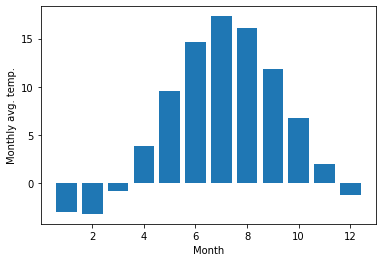

In [130]:
months = np.arange(1,13)
monthly_mean = [np.mean(data[data[:,1] == month, 3]) for month in months]

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

### Расчеты с многомерными данными

Когда функции, такие как min, max и т. Д., Применяются к многомерным массивам, иногда полезно применять вычисления ко всему массиву, а иногда только к строкам или столбцам. Используя аргумент `axis`, мы можем указать, как эти функции должны себя вести:

In [131]:
m = np.random.rand(3,3)
m

array([[0.18873356, 0.4690912 , 0.55658735],
       [0.68153804, 0.68887487, 0.74528052],
       [0.63569966, 0.47764503, 0.30030732]])

In [132]:
# global max
m.max()

0.7452805239665791

In [133]:
# max in each column
m.max(axis=0)

array([0.68153804, 0.68887487, 0.74528052])

In [134]:
# max in each row
m.max(axis=1)

array([0.55658735, 0.74528052, 0.63569966])

Многие другие функции и методы в классах array и matrix принимают один и тот же (необязательный) аргумент axis.

## Изменение формы, изменение размера и stacking массивов

Форму массива Numpy можно изменить без копирования базовых данных, что делает его быстрой операцией даже для больших массивов.

In [135]:
A

array([[  0,   0,   0,   0,   0],
       [  0,  10,  20,  30,  40],
       [  0,  20,  40,  60,  80],
       [  0,  30,  60,  90, 120],
       [  0,  40,  80, 120, 160]])

In [136]:
n, m = A.shape

In [137]:
B = A.reshape((1,n*m))
B

array([[  0,   0,   0,   0,   0,   0,  10,  20,  30,  40,   0,  20,  40,
         60,  80,   0,  30,  60,  90, 120,   0,  40,  80, 120, 160]])

In [138]:
B[0,0:5] = 5 # изменение массива
B

array([[  5,   5,   5,   5,   5,   0,  10,  20,  30,  40,   0,  20,  40,
         60,  80,   0,  30,  60,  90, 120,   0,  40,  80, 120, 160]])

In [139]:
A # и исходная переменная также изменяется. B - это только другой взгляд на одни и те же данные

array([[  5,   5,   5,   5,   5],
       [  0,  10,  20,  30,  40],
       [  0,  20,  40,  60,  80],
       [  0,  30,  60,  90, 120],
       [  0,  40,  80, 120, 160]])

Мы также можем использовать функцию `flatten`, чтобы превратить многомерный массив в вектор. Но эта функция создает копию данных.

In [140]:
B = A.flatten()

B

array([  5,   5,   5,   5,   5,   0,  10,  20,  30,  40,   0,  20,  40,
        60,  80,   0,  30,  60,  90, 120,   0,  40,  80, 120, 160])

In [141]:
B[0:5] = 10

B

array([ 10,  10,  10,  10,  10,   0,  10,  20,  30,  40,   0,  20,  40,
        60,  80,   0,  30,  60,  90, 120,   0,  40,  80, 120, 160])

In [142]:
A # теперь A не изменился, потому что данные B являются копией A, а не относятся к тем же данным

array([[  5,   5,   5,   5,   5],
       [  0,  10,  20,  30,  40],
       [  0,  20,  40,  60,  80],
       [  0,  30,  60,  90, 120],
       [  0,  40,  80, 120, 160]])

## Добавление нового измерения: newaxis

С помощью `newaxis` мы можем вставлять новые измерения в массив, например, преобразовывая вектор в матрицу столбца или строки:

In [144]:
v = np.array([1,2,3])

In [147]:
np.shape(v)

(3,)

In [148]:
# сделать матрицу-столбец вектора v
v[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [149]:
# матрица-столбец
v[:, np.newaxis].shape

(3, 1)

In [150]:
# матрица-ряд
v[np.newaxis,:].shape

(1, 3)

## Stacking и repeating массивов

Используя функции repeat, tile, vstack, hstack и concatenate, мы можем создавать большие векторы и матрицы из меньших:

### tile и repeat

In [151]:
a = np.array([[1, 2], [3, 4]])

In [152]:
# повторить каждый элемент 3 раза
np.repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [153]:
# замостить матрицу 3 раза
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

### concatenate

In [154]:
b = np.array([[5, 6]])

In [155]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [156]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### hstack и vstack

In [157]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [158]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Copy и "deep copy"

Для достижения высокой производительности присваивания в Python обычно не копируют нижележащие объекты. Это важно, например, когда объекты передаются между функциями, чтобы избежать чрезмерного копирования памяти, когда в этом нет необходимости (технический термин: pass by reference).

In [159]:
A = np.array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [160]:
# теперь B ссылается на тот же массив данных, что и A
B = A 

In [161]:
# изменение B влияет на A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [162]:
A

array([[10,  2],
       [ 3,  4]])

Если мы хотим избежать подобного поведения, желая получить новый полностью независимый объект `B`, скопированный из` A`, нам нужно сделать так называемую «глубокую копию» - "deep copy", используя функцию `copy`:

In [163]:
B = np.copy(A)

In [164]:
# теперь, если мы изменим B, A это не затронет
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [165]:
A

array([[10,  2],
       [ 3,  4]])

## Итерации по элементам массивов

Как правило, мы хотим избегать повторения элементов массивов всякий раз, когда это возможно (любой ценой). Причина в том, что в интерпретируемом языке, таком как Python, итерации очень медленны по сравнению с векторизованными операциями.

Однако иногда итерации неизбежны. В таких случаях цикл Python `for` является наиболее удобным способом перебора массива:

In [166]:
v = np.array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [167]:
M = np.array([[1,2], [3,4]])

for row in M:
    print("row", row)
    
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


Когда нам нужно перебрать каждый элемент массива и изменить его элементы, удобно использовать функцию `enumerate` для получения как элемента, так и его индекса в цикле` for`:

In [168]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # обновим матрицу M: возведение в квадрат каждого числа
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [169]:
M

array([[ 1,  4],
       [ 9, 16]])

## Функции векторизации

Как уже упоминалось несколько раз, для достижения хорошей производительности мы должны стараться избегать циклического перебора элементов в наших векторах и матрицах и вместо этого использовать векторизованные алгоритмы. Первый шаг в преобразовании скалярного алгоритма в векторизованный алгоритм - убедиться, что функции, которые мы пишем, работают с векторными входами.

In [170]:
def Theta(x):
    """
    Скалярная реализация ступенчатой функции Хевисайда.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [171]:
Theta(array([-3,-2,-1,0,1,2,3]))

NameError: name 'array' is not defined

Хорошо, это не сработало, потому что мы не написали функцию `Theta`, чтобы она могла обрабатывать векторный ввод ...

Чтобы получить векторизованную версию Theta, мы можем использовать функцию Numpy `vectorize`. Во многих случаях она может автоматически векторизовать функцию:

In [172]:
Theta_vec = np.vectorize(Theta)

In [173]:
Theta_vec(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

Мы также можем реализовать функцию для приема векторного ввода с самого начала (требует больше усилий, но может дать лучшую производительность):

In [174]:
def Theta(x):
    """
    Векторная реализация ступенчатой функции Хевисайда.
    """
    return 1 * (x >= 0)

In [175]:
Theta(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [176]:
# все еще работает для скаляров
Theta(-1.2), Theta(2.6)

(0, 1)

## Использование массивов в условиях

При использовании массивов в условиях, например операторов if и других логических выражений, необходимо использовать any или all, что требует, чтобы любой или все элементы в массиве оценивались как True:

In [179]:
M

array([[  1,  16],
       [ 81, 256]])

In [177]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

at least one element in M is larger than 5


In [178]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


## Типизация

Поскольку массивы Numpy *статически типизированы*, тип массива не изменяется после создания. Но мы можем явно преобразовать массив одного типа в другой, используя функции `astype` (см. Также аналогичную функцию` asarray`). Это всегда создает новый массив нового типа:

In [179]:
M.dtype

dtype('int64')

In [180]:
M2 = M.astype(float)

M2

array([[ 1.,  4.],
       [ 9., 16.]])

In [181]:
M2.dtype

dtype('float64')

In [182]:
M3 = M.astype(bool)

M3

array([[ True,  True],
       [ True,  True]])